In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as mplt

import pylab as plt

from matplotlib import rc

from pylab import figure, show, legend, xlabel, ylabel


In [2]:
df=pd.read_csv('/home/franciscoeas/Evaluación 2/datos1.csv')

In [3]:
df.columns=['Año','Mes','Año-Mes','Manchas','B','C','D']
del df['D']

In [4]:
df.head()

,Año,Mes,Año-Mes,Manchas,B,C
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1


In [5]:
df.describe()

,Año,Mes,Año-Mes,Manchas,B,C
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,1882.375350,6.495798,1882.873012,82.923561,5.610955,89.781201
std,77.304865,3.451370,77.304802,67.819418,5.234367,185.247160
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000
25%,1815.000000,3.000000,1815.958000,25.300000,-1.000000,-1.000000
50%,1882.000000,6.000000,1882.874000,69.700000,5.400000,30.000000
75%,1949.000000,9.000000,1949.790000,123.300000,9.400000,31.000000
max,2016.000000,12.000000,2016.708000,398.200000,23.500000,977.000000


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Año        0
Mes        0
Año-Mes    0
Manchas    0
B          0
C          0
dtype: int64

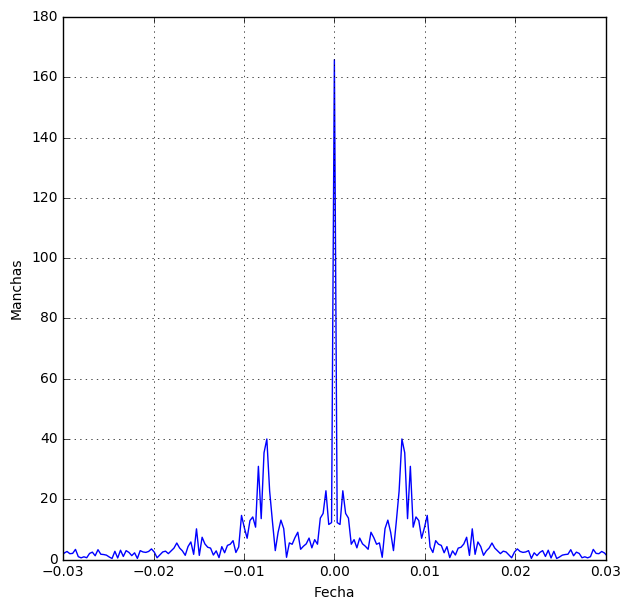

In [40]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 3213
# sample spacing
T = 1
x = df['Año']
y = df['Manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yplot))
plt.xlim(-0.03,0.03 )
fig=plt.gcf()
fig.set_size_inches(7,7)

plt.xlabel("Fecha")
plt.ylabel("Manchas")

plt.grid()
plt.show()

In [27]:
a = 2*np.absolute(yf)/N

In [28]:
#PICOS
print(np.where(a[:,]>10))
b= a[a[:,]>10]
b


(array([   0,    1,    2,    3,    4,    5,   18,   19,   22,   23,   24,
         25,   26,   27,   28,   29,   30,   32,   33,   49, 3164, 3180,
       3181, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3194,
       3195, 3208, 3209, 3210, 3211, 3212]),)


array([ 165.84712107,   12.2404616 ,   11.62644929,   22.79918361,
         15.28281214,   13.73590511,   10.24940903,   13.06489499,
         12.50737479,   22.67815211,   39.98723321,   35.419832  ,
         13.56290861,   30.90803788,   10.73240059,   14.12154193,
         12.90840658,   10.55344184,   14.6282459 ,   10.17270309,
         10.17270309,   14.6282459 ,   10.55344184,   12.90840658,
         14.12154193,   10.73240059,   30.90803788,   13.56290861,
         35.419832  ,   39.98723321,   22.67815211,   12.50737479,
         13.06489499,   10.24940903,   13.73590511,   15.28281214,
         22.79918361,   11.62644929,   12.2404616 ])

In [33]:
#AMPLITUD
A1=2.0*np.absolute(yf[int(23),]/N)
A2=2.0*np.absolute(yf[int(24),]/N)
A3=2.0*np.absolute(yf[int(25),]/N)
#FRECUENCIA
f1= xf[int(N/2 +23),]
f2= xf[int(N/2 +24),]
f3= xf[int(N/2 +25),]
#PERIODO
T1=1/f1
T2=1/f2
T3=1/f3

In [42]:
print('Modo 1')
print('Número de manchas=',A1)
print('Frecuencia=',f1)
print('Periodo=',T1/12)

print('Modo 2')
print('Número de manchas=',A2)
print('Frecuencia=',f2)
print('Periodo=',T2/12)

print('Modo 3')
print('Número de manchas=',A3)
print('Frecuencia=',f3)
print('Periodo=',T3/12)

Modo 1
Número de manchas= 22.6781521056
Frecuencia= 0.00715841892312
Periodo= 11.6413043478
Modo 2
Número de manchas= 39.9872332086
Frecuencia= 0.00746965452848
Periodo= 11.15625
Modo 3
Número de manchas= 35.4198320032
Frecuencia= 0.00778089013383
Periodo= 10.71


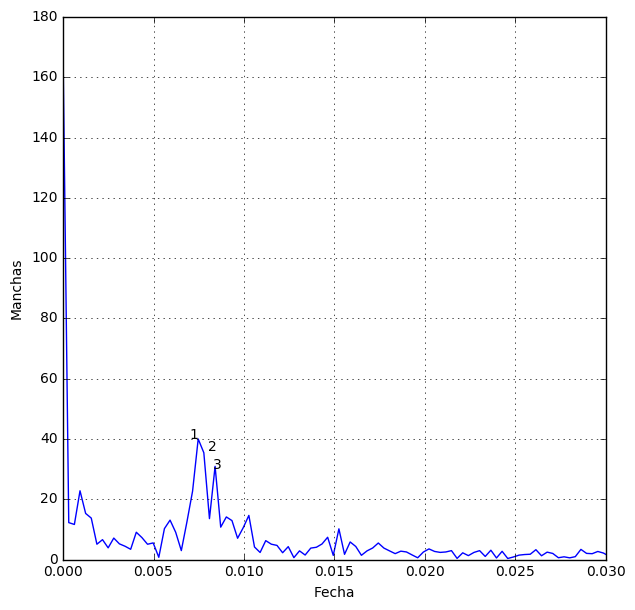

In [41]:
# number of signal points
N = 3213
# sample spacing
T = 1.0
x = df['Año']
y = df['Manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yplot))
plt.xlim(0,0.03 )
fig=plt.gcf()
fig.set_size_inches(7,7)

plt.text(0.007,40,'1')
plt.text(0.008,36,'2')
plt.text(0.0083,30,'3')

plt.xlabel("Fecha")
plt.ylabel("Manchas")

plt.grid()

plt.show()